# HOMEWORK 1. Finding the hidden writer. Fco. de Borja González.
This first project is about figuring out who is the writer of a model using as input and training data .txt files that contain books of the two presumed writers using Naive Bayes Classifiers. This two famous writers are Verne and Maupassant and we will learn their differences in style through the probabilities of the different words they wrote on the texts we have been given. 

## Initial imports

In [1]:
from os import listdir
from os.path import isfile, join
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif, mutual_info_classif

from sklearn.metrics import accuracy_score
from sklearn import naive_bayes, metrics
import numpy as np


import os
import textwrap
import math
import numpy as np
import matplotlib.pyplot as plt

##  File Reading and File Preprocessing.
We have downloaded 4 books of each writer and and the novel we want to assing. The books will be stored on the input foldier. Since we have not much books to train, I will cut the books on 10 equal parts as if they were mini-books and I will retrieve the name of the writer (labels) from the title of the .txt document. This will be helpfull for perfomance purposes and for having more precise results on the % of classifications but the true results will depend on word's frecuency. Also, I have observed that all the books at the end have a generic part of generic data that is not important and it just slows our computer since they are characters and are stored on memory so I found in which character number do they begin and I delete from that point untill the end of the document.

In [2]:
initial_path = os.getcwd()
directory_books = os.path.join(initial_path, 'books')

In [3]:
texts_classified = []
authors_labels = []
texts_unknown = []
labels_unknown = []

for idx, filename in enumerate(os.listdir(directory_books)):
    data = open(os.path.join(directory_books, filename), encoding="latin-1").read()
    data = data.replace('\n',' ')
    data = data.replace('\t',' ')
    data = data[:data.find('END OF THIS PROJECT')]
    for i in textwrap.wrap(data, math.ceil(len(data)/10)):
        if len(i) > 40:
                new_label = filename.split('-')
                if new_label[0] != 'texte':
                    authors_labels.append(new_label[0])
                    texts_classified.append(i)
                else:
                    labels_unknown.append(new_label[0])
                    texts_unknown.append(i)
                    
                

Now, we have 2 lists with the same lenght, one with the different labels of the writer extracted from the titles of the .txt files and another with the chunks of text from the books with the garbage text of the end removed. Also we have the data to be classified.

In [4]:
print("Number of Labels of Chunks --> ", len(authors_labels), authors_labels)
print(" ")
print("Number of Unlabelled Chunks --> ", len(labels_unknown), labels_unknown)

Number of Labels of Chunks -->  80 ['maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'maupassant', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne', 'verne']
 
Number of Unlabelled Chunks -->  10 ['text

In [5]:
print("Number of Labeled Chunks --> ", len(texts_classified))
print(" ")
print("Number of Unabeled Chunks --> ", len(texts_unknown))

Number of Labeled Chunks -->  80
 
Number of Unabeled Chunks -->  10


## Some numbers. 
We will check how many characters we have by writer.

In [6]:
import pandas as pd
info = pd.DataFrame({'author': authors_labels, 'texts': texts_classified})
info['Length']  = info['texts'].str.len()
info

,author,texts,Length
0,maupassant,BOULE DE SUIF L'ÃPAVE--DÃCOUVERTE--UN PA...,22526
1,maupassant,annonÃ§a que dÃ©cidÃ©ment il se sentait un rud...,22524
2,maupassant,qu'est-ce que Ã§a vous fait? Elle avait l'air...,22528
3,maupassant,"potage, M. Follenvie reparut, rÃ©pÃ©tant sa ph...",22526
4,maupassant,"Â«Il me raconta le sinistre, trÃ¨s simple d'ai...",22530
5,maupassant,"dents jaunes et dÃ©mesurÃ©es. On sentait, en ...",22523
6,maupassant,"opÃ©ration, lui aurait paru prÃ©fÃ©rable. Elle...",22530
7,maupassant,glissait sur les lÃ¨vres. Depuis trente ans il...,22521
8,maupassant,autrefois. Nous ne nous quittions jamais; et l...,22529
9,maupassant,me piquaient Ã prÃ©sent comme des coups d'aig...,22531


In [7]:
print("Average of characters written by chunk")
print(" ")
print(info.groupby('author').mean())
print(" ")
print("Number or characters by author --> ")
print(" ")
print( info.groupby('author').sum())

Average of characters written by chunk
 
               Length
author               
maupassant  28427.825
verne       62050.875
 
Number or characters by author --> 
 
             Length
author             
maupassant  1137113
verne       2482035


We can see that the average lenght of each chunk depends on the author. This might be a problem that would cause overfitting and balancing problems but it is the data we have. It also makes sense that the lenght of the chunks written by Verne have more or less two times more words since it is consequent with the number of characters we have.

# Data Preprocessing.
Once we have all the files processed the data is ready to be studied and preprocessed for a good Machine Learning and Statistical Modelling part which is what I will be doing on this next section. We will begin by turning the names of the authors to a boolean variable 0 - 1.

In [8]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(authors_labels)
authors_encoded = label_encoder.transform(authors_labels)
print("Authors encoded --> ", authors_encoded)
print("Number of chunks by author")
unique, counts = np.unique(authors_encoded, return_counts=True)
print(dict(zip(unique, counts)))
label_encoder.classes_

Authors encoded -->  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Number of chunks by author
{0: 40, 1: 40}


array(['maupassant', 'verne'], dtype='<U10')

## Test - Set Splitting

I will continue by splitting the dataset. The most common distribution of the sets is a 70 - 30 splitting. Latter on we could try to change this proportion if necessary. For the random_state parameter If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [9]:
chunks_train, chunks_test, authors_train, authors_test = train_test_split(
    texts_classified, authors_encoded, test_size=0.3, random_state=1)

In [10]:
len(chunks_train), type(chunks_train), chunks_train[0][0:40]

(56, list, 'pas. Le paysan devenait fou. Il se leva ')

## Text to Integer Data.
As we know, the ML algorithms are used to work using integer data. We have some nice tools for this step.
We will begin by defining the parameters of our tfidf vectorizer model. use_idf : boolean, default=True
Enable inverse-document-frequency reweighting.

smooth_idf : boolean, default=True
Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

sublinear_tf : boolean, default=False
Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).


Definition of the tfidf vectorizer. Arguments provided here are may be key for the final outcome.
In particular we have modified the token pattern so that symbols are kept on the matrix (they may be relevant for the writing style of the author).

In [11]:
# 
args = {
    "encoding": "latin-1", 
    "stop_words": None, # They may reflect the style of the author
    "token_pattern": r"(?u)\b\w\w+\b|\r|\n|\'|\"|\¿|\?|¡|!|\(|\)|\[|\]|<|>|,|;|:|\-+|\.", # Keep punctuation symbols
    "lowercase": True, 
    "norm": "l2", 
    "use_idf": True, 
    "smooth_idf": True,
    "sublinear_tf": True
}

In [12]:
# Text vectorization (take words from train set, then convert test and anonymous data)
vectorizer = TfidfVectorizer(**args)
features_train = vectorizer.fit_transform(chunks_train)
features_test = vectorizer.transform(chunks_test)
features_unknown = vectorizer.transform(texts_unknown)

In [13]:
features_train, features_test, features_unknown

(<56x21693 sparse matrix of type '<class 'numpy.float64'>'
 	with 105709 stored elements in Compressed Sparse Row format>,
 <24x21693 sparse matrix of type '<class 'numpy.float64'>'
 	with 45384 stored elements in Compressed Sparse Row format>,
 <10x21693 sparse matrix of type '<class 'numpy.float64'>'
 	with 35675 stored elements in Compressed Sparse Row format>)

### FEATURES TRAIN SAMPLES

In [14]:
print("Random element of matrix", "Random element of matrix", features_train[0,1])
print("Random element of matrix", features_train[0,21691])
print(features_train.todense())
features_train.shape

Random element of matrix Random element of matrix 0.05333923925193049
Random element of matrix 0.0
[[0.03830714 0.05333924 0.         ... 0.02215198 0.         0.        ]
 [0.03044604 0.04013846 0.02318944 ... 0.01618951 0.         0.        ]
 [0.03511526 0.04265717 0.         ... 0.02056718 0.         0.        ]
 ...
 [0.02881812 0.04082189 0.         ... 0.02090617 0.         0.        ]
 [0.03258146 0.05496299 0.01446825 ... 0.02252954 0.         0.        ]
 [0.02433734 0.04168538 0.00979558 ... 0.0198623  0.02026281 0.        ]]


(56, 21693)

### FEATURES TEST SAMPLES

In [15]:
print("Random element of matrix", features_test[0,1])
print("Random element of matrix", features_test[0,21691])
print(features_test.todense())
features_test.shape

Random element of matrix 0.043543614595100255
Random element of matrix 0.012697247225141354
[[0.03265898 0.04354361 0.0248004  ... 0.01982884 0.01269725 0.        ]
 [0.04448387 0.05683504 0.         ... 0.02047475 0.0175663  0.        ]
 [0.02563331 0.04421765 0.         ... 0.02422752 0.02158729 0.        ]
 ...
 [0.03321127 0.05780643 0.01474792 ... 0.01846939 0.         0.        ]
 [0.03010997 0.0423878  0.01017807 ... 0.02210261 0.         0.        ]
 [0.02657677 0.03326914 0.01150884 ... 0.02052649 0.00830447 0.        ]]


(24, 21693)

As we have seen, we have created matrices with words as columns with their weights as values. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

Since we will be playing just with the words used on the training set and despite the fact that the set of words is rather big the classes need to be balanced in order not to omit words on the test that might not be on the train set. Let see how balanced are the clases of the train set.

In [16]:
authors_train
print("Number of chunks by author")
unique, counts = np.unique(authors_train, return_counts=True)
print(dict(zip(unique, counts)))

Number of chunks by author
{0: 29, 1: 27}


Eventhough the classes may look well balanced we have previously seen that the number of characters we have for Jules Verne is two times the number we have for Maupassant.

### FEATURE SELECTION.
In order to make some dimensionality reduction, improve the performance of the model and reduce the variance we are going to perform a little feature selection since our matrix is too big as we have seen. With sklearn.feature_selection.SelectPercentile we select features according to a percentile of the highest scores. With the threshold parameter we can control what happens when we select the most influent ones. 

In [17]:
threshold = 3
selector = SelectPercentile(f_classif, percentile = threshold)
selector.fit(features_train, authors_train)
print("Lenght of the features BEFORE selection --> ", features_train.shape)
print(" ")
print(features_train.todense())
features_train = selector.transform(features_train).toarray()
features_test = selector.transform(features_test).toarray()
features_unknown = selector.transform(features_unknown).toarray()

Lenght of the features BEFORE selection -->  (56, 21693)
 
[[0.03830714 0.05333924 0.         ... 0.02215198 0.         0.        ]
 [0.03044604 0.04013846 0.02318944 ... 0.01618951 0.         0.        ]
 [0.03511526 0.04265717 0.         ... 0.02056718 0.         0.        ]
 ...
 [0.02881812 0.04082189 0.         ... 0.02090617 0.         0.        ]
 [0.03258146 0.05496299 0.01446825 ... 0.02252954 0.         0.        ]
 [0.02433734 0.04168538 0.00979558 ... 0.0198623  0.02026281 0.        ]]


In [18]:
print("Lenght of the features AFTER selection --> ", features_train.shape)
print(" ")
print(features_train)

Lenght of the features AFTER selection -->  (56, 651)
 
[[0.05333924 0.0575891  0.03581479 ... 0.01597212 0.025451   0.        ]
 [0.04013846 0.04378896 0.03365771 ... 0.01352353 0.00590167 0.        ]
 [0.04265717 0.04312512 0.03498056 ... 0.01138837 0.01969507 0.        ]
 ...
 [0.04082189 0.04355165 0.03069472 ... 0.01700475 0.01666168 0.        ]
 [0.05496299 0.05938145 0.03676384 ... 0.00959417 0.0229283  0.        ]
 [0.04168538 0.04418123 0.03051048 ... 0.01913556 0.01660799 0.        ]]


As we can see, we have reduced quite a lot the dimension of our matrix. This method seems to take into account the intracolumn variance and if it is a word that appears quite the same number of times by document it is discarded.

### Chosen Words.
Does it exist a way to check which words we have chosen and which ones we have selected as most influent? The answer is YES.
And we can retrieve them in alphabetical order.

In [19]:
# Get idxs of columns kept
index_word = selector.get_support(indices=True)
#print("Index of words chosen", index_word)
words = vectorizer.get_feature_names()
#print("All words used", words)


In [20]:
influent_words = [words[i] for i in index_word] 
print("Number of words taken after selection (", threshold, "% most relevant only):", len(influent_words))
print("\nFeatures:\n", influent_words)

Number of words taken after selection ( 3 % most relevant only): 651

Features:
 ["'", ',', '-', '--', '.', '11', '21', ':', ';', '[', ']', 'abondamment', 'absolu', 'absolument', 'accord', 'accosta', 'accã', 'action', 'actuellement', 'administration', 'agi', 'agir', 'agissait', 'agit', 'agrã', 'ailleurs', 'aimã', 'ainsi', 'aisã', 'alla', 'alors', 'amour', 'amã', 'angle', 'angoisse', 'animaux', 'ans', 'appareil', 'appartenait', 'arc', 'argent', 'aride', 'arriver', 'arrivã', 'aspect', 'assez', 'assit', 'atmosphã', 'atteindre', 'attraction', 'au', 'aucune', 'aucunement', 'audacieux', 'auquel', 'auraient', 'aurions', 'aurons', 'autre', 'aux', 'avait', 'avec', 'avons', 'avouer', 'axel', 'ayons', 'baie', 'ballon', 'bas', 'base', 'bien', 'blancs', 'bleu', 'bonne', 'bouche', 'bout', 'bras', 'brusquement', 'but', 'bã', 'bãªte', 'cabine', 'calculã', 'canot', 'cap', 'capitale', 'cas', 'ce', 'ceci', 'celle', 'celles', 'cent', 'centaine', 'central', 'centrale', 'centre', 'cents', 'cependant', 'cert

Many models usually make use of a thing called stop_words. This is to delete the most common stop words from a language such as "and", "up" or "under" but I think that they might reflect the style of the author and also if they are not too informative they have been removed with selectPercentile feature.

# Modelling. 
Once we have done all the preprocessing part and studied a little bit the inputs of the model we can begin performing some modellization.

## Naive Bayes Classifiers
Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features **which is clearly our case** since written words do not have nothing to do among themselves. 

It has been studied extensively since the 1950s and remains a popular (baseline) method for text categorization, the problem of judging documents as belonging to one category or the other (such as spam or legitimate, sports or politics, etc.) with word frequencies as the features. With appropriate pre-processing, it is competitive in this domain with more advanced methods including support vector machines.It also finds application in automatic medical diagnosis.

Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem  and requires a small number of training data to estimate the parameters necessary for classification.

If we go to the sklearn documentation we can check that there are 4 different Naive Bayes algorithms:

 1. Gaussian NB: The likelihood of the features is assumed to be Gaussian.
 2. Multinomial NB: implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification.
 3. Complement NB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets.
 4. BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.



In [21]:
#clf_list = [GaussianNB(), MultinomialNB() ,ComplementNB(), BernoulliNB()]
#from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
clf_list = [GaussianNB(), MultinomialNB(), MultinomialNB(0.5), MultinomialNB(0.1)]#, BernoulliNB()]

for NB in clf_list:
    # Train and predict steps
    #print(NB)
    NB.fit(features_train, authors_train)
    authors_train_predicted = NB.predict(features_train)
    authors_test_predicted = NB.predict(features_test)
    acc_train = accuracy_score(authors_train, authors_train_predicted)
    print("Train set accuracy: for model {}".format(NB), acc_train)
    acc_test = accuracy_score(authors_test, authors_test_predicted)
    print("Test set accuracy:", acc_test)
    print(" ")


Train set accuracy: for model GaussianNB(priors=None, var_smoothing=1e-09) 1.0
Test set accuracy: 0.6666666666666666
 
Train set accuracy: for model MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 0.8571428571428571
Test set accuracy: 0.8333333333333334
 
Train set accuracy: for model MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True) 0.9285714285714286
Test set accuracy: 0.8333333333333334
 
Train set accuracy: for model MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True) 1.0
Test set accuracy: 1.0
 


## Results and conclusions
### Naive Bayes Classifiers
As we can see the Gaussian model is the one with the lowest performance on test set after scoring with 100% on train. Thus, we have clear signs of overfitting. This model is only a good choice if the distribution of the variables is Gaussian.
We can check the probability distribution of 7 random words:

Probability Distribution by document of word number 61 which is avec


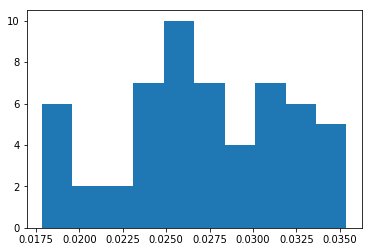

Probability Distribution by document of word number 268 which is homme


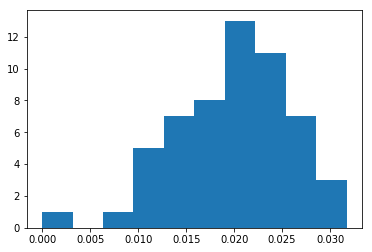

Probability Distribution by document of word number 173 which is disposition


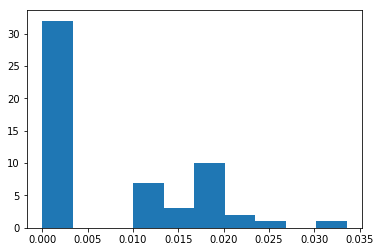

Probability Distribution by document of word number 256 which is gions


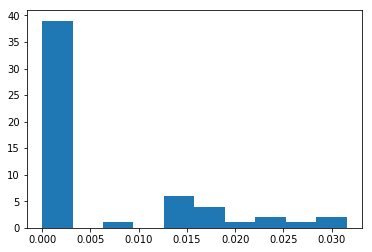

Probability Distribution by document of word number 175 which is disque


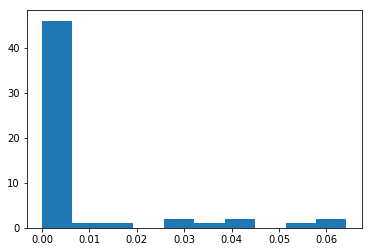

Probability Distribution by document of word number 447 which is pouvaient


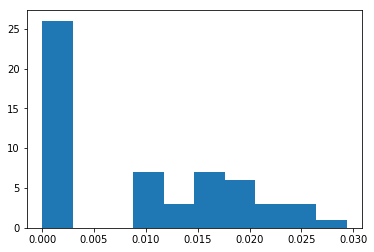

Probability Distribution by document of word number 332 which is mains


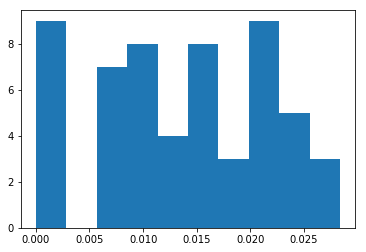

In [22]:
indx_word = np.random.randint(1,len(influent_words),7)
for i in indx_word:
    print("Probability Distribution by document of word number", i, "which is", influent_words[i])
    plt.hist(features_train[:,i])
    plt.show()

Note that the probability distribution of our words is not gaussian so this might be the reason why GaussianNB might not be the best model. This is why the multinomial model performs the best with an $\alpha$ parameter of 0.1 and the model improves as we decrease $\alpha$. I know that there is a ***Bernoulli NB model*** but I have not used it since our features are not binary.
There is one more NB classifier on sklearn which is ***Complement Naive Bayes*** but I can not use it because it is just implemented on the development mode of the last version on sklearn and that is hard to install with Anaconda distribution on Windows. This could be the best model since it is for unbalanced data that could be our case since we have seen that there is two times more words from Verne than from Maupassant.


## Author Prediction
Now, let us accomplish the final step of our work. Try to guess who has written the misteryous book. For that, we are going to check between the models what are the answers.:


In [23]:
# Predict the docs with unknown author
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
clf_list = [GaussianNB(), MultinomialNB(), MultinomialNB(0.5), MultinomialNB(0.1)]#, BernoulliNB()]

for NB in clf_list:
    NB.fit(features_train, authors_train)
    authors_unknown_predicted = NB.predict(features_unknown)
    print ("Predictions for {}".format(NB))
    print(authors_unknown_predicted)
    vernes = np.sum((authors_unknown_predicted))/len(authors_unknown_predicted) *100
    print("% of Vernes {}".format(vernes))
    print(label_encoder.inverse_transform(authors_unknown_predicted))
    print(" ")

Predictions for GaussianNB(priors=None, var_smoothing=1e-09)
[1 1 1 1 1 1 1 1 1 1]
% of Vernes 100.0
['verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne'
 'verne']
 
Predictions for MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
[0 1 1 1 1 0 1 1 1 0]
% of Vernes 70.0
['maupassant' 'verne' 'verne' 'verne' 'verne' 'maupassant' 'verne' 'verne'
 'verne' 'maupassant']
 
Predictions for MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
[1 1 1 1 1 1 1 1 1 1]
% of Vernes 100.0
['verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne'
 'verne']
 
Predictions for MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
[1 1 1 1 1 1 1 1 1 1]
% of Vernes 100.0
['verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne' 'verne'
 'verne']
 


## Final conclusions
As we have seen most of the models do not show any kind of doubt about the writer of the chunk. 3 Of 4 models say that all the chunks have been written by Verne and in just one we get a little bit more doubts. But we know that it was not the best model so that result does not need to be taken into account. 

We can know that Verne is the writer just by opening the .txt and reading the title of the book which is ***LES ENFANTS DU CAPITAINE GRANT*** , a novel by the French writer Jules Verne, published in 1867–1868. So, we can be quite happy about the performance of our algorithm which is also very fast to train and compile, another good feature of Naive Bayes classifiers.

To end up I am very happy with the outcomes of this work since I had never done nothing related to NLP and text mining and I have found it a very interesting task and I have also learnt a lot of things about text analysis and statistics. 